In [1]:
import tensorflow as tf

C:\Users\HP-PC\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


## Convolutional Neural Networks

https://www.learnopencv.com/image-classification-using-convolutional-neural-networks-in-keras/


In machine learning, a convolutional neural network (CNN, or ConvNet) is a class of deep, feed-forward artificial neural networks, most commonly applied to analyzing visual imagery.

CNNs use a variation of multilayer perceptrons designed to require minimal preprocessing. They are also known as shift invariant or space invariant artificial neural networks (SIANN), based on their shared-weights architecture and translation invariance characteristics.

Convolutional networks were inspired by biological processes in that the connectivity pattern between neurons resembles the organization of the animal visual cortex. Individual cortical neurons respond to stimuli only in a restricted region of the visual field known as the receptive field. The receptive fields of different neurons partially overlap such that they cover the entire visual field.

CNNs use relatively little pre-processing compared to other image classification algorithms. This means that the network learns the filters that in traditional algorithms were hand-engineered. This independence from prior knowledge and human effort in feature design is a major advantage.

They have applications in image and video recognition, recommender systems and natural language processing.

![title](1cnn-schema.jpg)

A CNN consists of an input and an output layer, as well as multiple hidden layers. The hidden layers of a CNN typically consist of convolutional layers, pooling layers, fully connected layers and normalization layers.

Description of the process as a convolution in neural networks is by convention. Mathematically it is a cross-correlation rather than a convolution. This only has significance for the indices in the matrix, and thus which weights are placed at which index.

### Convolutional
The convolutional layer can be thought of as the eyes of the CNN. The neurons in this layer look for specific features. If they find the features they are looking for, they produce a high activation.

Convolution can be thought of as a weighted sum between two signals ( in terms of signal processing jargon ) or functions ( in terms of mathematics ). In image processing, to calculate convolution at a particular location (x, y), we extract k x k sized chunk from the image centered at location (x,y). We then multiply the values in this chunk element-by-element with the convolution filter (also sized k x k) and then add them all to obtain a single output. 

Although fully connected feedforward neural networks can be used to learn features as well as classify data, it is not practical to apply this architecture to images. A very high number of neurons would be necessary, even in a shallow (opposite of deep) architecture, due to the very large input sizes associated with images, where each pixel is a relevant variable. For instance, a fully connected layer for a (small) image of size 100 x 100 has 10000 weights for each neuron in the second layer. The convolution operation brings a solution to this problem as it reduces the number of free parameters, allowing the network to be deeper with fewer parameters. For instance, regardless of image size, tiling regions of size 5 x 5, each with the same shared weights, requires only 25 learnable parameters. In this way, it resolves the vanishing or exploding gradients problem in training traditional multi-layer neural networks with many layers by using backpropagation.

![title](3test.gif)

### Pooling
Another important concept of CNNs is pooling, which is a form of non-linear down-sampling. There are several non-linear functions to implement pooling among which max pooling is the most common. It partitions the input image into a set of non-overlapping rectangles and, for each such sub-region, outputs the maximum. The intuition is that the exact location of a feature is less important than its rough location relative to other features. The pooling layer serves to progressively reduce the spatial size of the representation, to reduce the number of parameters and amount of computation in the network, and hence to also control overfitting. It is common to periodically insert a pooling layer between successive convolutional layers in a CNN architecture. The pooling operation provides another form of translation invariance.

![title](2Max_pooling.png)

### Fully connected
Fully connected layers connect every neuron in one layer to every neuron in another layer. It is in principle the same as the traditional multi-layer perceptron neural network (MLP).

### Receptive field
In neural networks, each neuron receives input from some number locations in the previous layer. In a fully-connected layer, each neuron receives input from every element of the previous layer. In a convolutional layer, neurons receive input from only a restricted subarea of the previous layer. Typically the subarea is of a square shape (e.g., size 5 by 5). The input area of a neuron is called its receptive field. So, in a fully connected layer, the receptive field is the entire previous layer. In a convolutional layer, the receptive area is smaller than the entire previous layer.

### Weights
Each neuron in a neural network computes an output value by applying some function to the input values coming from the receptive field in the previous layer. The function that is applied to the input values is specified by a vector of weights and a bias (typically real numbers). Learning in a neural network progresses by making incremental adjustments to the biases and weights. The vector of weights and the bias are called a filter and represents some feature of the input (e.g., a particular shape). A distinguishing feature of CNNs is that many neurons share the same filter. This reduces memory footprint because a single bias and a single vector of weights is used across all receptive fields sharing that filter, rather than each receptive field having its own bias and vector of weights.


1. Each CNN unit has a k x k filter. This filter is passed over entire image when input of that image is given to CNN unit.
2. Each CNN unit will start learning some aspect of image
3. Different units will start learning differnt parts of the images for eg. for car type image some units will learn about wheels and some units will learn about doors, headlights, etc.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split 
from sklearn import preprocessing
import time

C:\Users\HP-PC\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
from keras.datasets import cifar10

Using TensorFlow backend.


In [4]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Dropout,Flatten
from sklearn import datasets

In [5]:
#(xtrain,ytrain),(xtest,ytest)=cifar10.load_data() 
import cifar10
cifar10.data_path = "data/CIFAR-10/"
cifar10.maybe_download_and_extract()

xtrain=cifar10.load_training_data()

Data has apparently already been downloaded and unpacked.
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_1
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_2
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_3
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_4
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_5


In [6]:
xtrain[0].shape, xtrain[1].shape

((50000, 32, 32, 3), (50000,))

In [7]:
xtrain,xval,ytrain,yval=train_test_split(xtrain[0],xtrain[1],test_size=0.1,random_state=1)

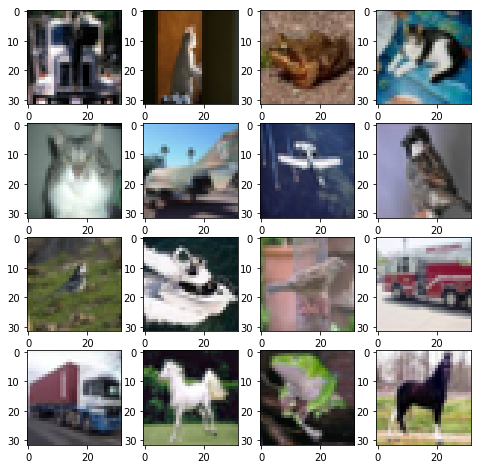

In [8]:
fig=plt.figure(figsize=(8,8))
for i in range(16):
    ax=fig.add_subplot(4,4,i+1)
    ax.imshow(xtrain[i])
plt.show()

In [9]:
oec = preprocessing.OneHotEncoder(sparse=False)
ytr=oec.fit_transform(ytrain.reshape((len(ytrain),1)))
yval=oec.transform(yval.reshape((len(yval),1)))

In [10]:
def createModel(inshape,nClasses):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=inshape))
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))

    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
 
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
 
    model.add(Flatten())
    
    model.add(Dense(64, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(nClasses, activation='softmax'))
     
    return model

In [11]:
model=createModel((32,32,3),10)

In [12]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
__________

In [ ]:
batch_size = 200
epochs =15
start=time.time()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
 
history=model.fit(xtrain, ytr, batch_size=batch_size, epochs=epochs,validation_data=(xval,yval))
 
model.evaluate(xtrain, ytr)
end=time.time()-start
end

Train on 45000 samples, validate on 5000 samples
Epoch 1/5
45000/45000 [==============================] - 55s 1ms/step - loss: 0.5041 - acc: 0.8206 - val_loss: 0.7340 - val_acc: 0.7578
Epoch 2/5
45000/45000 [==============================] - 54s 1ms/step - loss: 0.4591 - acc: 0.8352 - val_loss: 0.7925 - val_acc: 0.7466
Epoch 3/5
45000/45000 [==============================] - 54s 1ms/step - loss: 0.4205 - acc: 0.8498 - val_loss: 0.7480 - val_acc: 0.7648
Epoch 4/5
45000/45000 [==============================] - 54s 1ms/step - loss: 0.3947 - acc: 0.8592 - val_loss: 0.7671 - val_acc: 0.7616
Epoch 5/5
34600/45000 [======================>.......] - ETA: 12s - loss: 0.3549 - acc: 0.8729

In [14]:
xtest=cifar10.load_test_data()

Loading data: data/CIFAR-10/cifar-10-batches-py/test_batch


In [15]:
ypred=model.predict(xtest[0])

In [16]:
ypred=np.argmax(ypred,1)

In [17]:
from sklearn.metrics import confusion_matrix
confusion_matrix(xtest[1], ypred)

array([[793,  25,  60,  26,  16,   8,   6,   6,  36,  24],
       [ 24, 872,   3,  15,   0,   3,   4,   5,  19,  55],
       [ 63,   5, 658,  64,  67,  58,  31,  34,  11,   9],
       [ 25,  11,  93, 572,  44, 162,  43,  27,  14,   9],
       [ 21,   4,  95,  77, 670,  34,  29,  60,   7,   3],
       [ 15,   7,  53, 167,  40, 652,  14,  40,   5,   7],
       [  4,  11,  79,  72,  35,  16, 772,   5,   4,   2],
       [ 17,   4,  44,  51,  47,  60,   4, 761,   4,   8],
       [ 63,  41,  16,  23,   6,   3,   5,   5, 819,  19],
       [ 29,  89,   8,  21,   6,   2,   1,  10,  21, 813]], dtype=int64)

In [18]:
from sklearn.metrics import classification_report
print(classification_report(xtest[1], ypred))

             precision    recall  f1-score   support

          0       0.75      0.79      0.77      1000
          1       0.82      0.87      0.84      1000
          2       0.59      0.66      0.62      1000
          3       0.53      0.57      0.55      1000
          4       0.72      0.67      0.69      1000
          5       0.65      0.65      0.65      1000
          6       0.85      0.77      0.81      1000
          7       0.80      0.76      0.78      1000
          8       0.87      0.82      0.84      1000
          9       0.86      0.81      0.83      1000

avg / total       0.74      0.74      0.74     10000



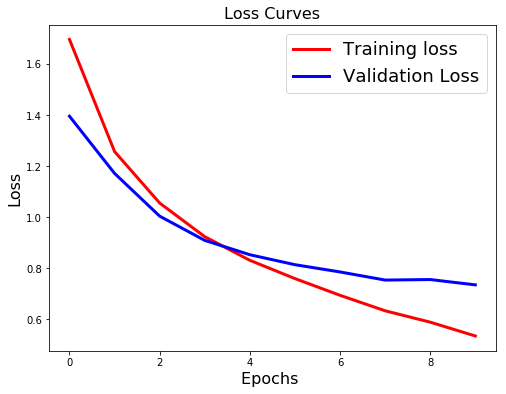

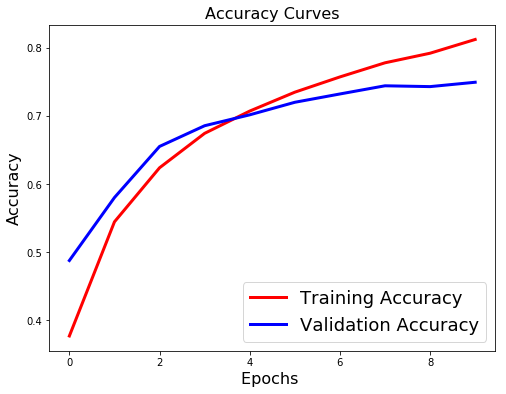

In [19]:
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)

plt.title('Accuracy Curves',fontsize=16)
plt.show()